# PC Session 4

# **Causal Machine Learning**

**Authors:**
Jonathan Chassot, [Helge Liebert](https://hliebert.github.io/), and [Anthony Strittmatter](http://www.anthonystrittmatter.com)

## Job Corps Program

The Job Corps is the largest U.S. labor market program targeting disadvantaged youths.
It provides academic, vocational, and social training, as well as health care counseling and job
search assistance, for an average duration of eight to nine months. Mathematica Policy Research carried out a randomized experiment with the Job Corps. About 60% of the experimental participants were randomly selected to receive an offer to participate in the Job Corps. Out of these, 73\% joined the Job Corps program and
actually started to participate after an average duration of 1.4 months. The remaining experimental participants were assigned to the control group. Control group members were not eligible for the
Job Corps programs for three years following randomization (approximately 1\% participated
anyway).

We estimate the effects of receiving an offer to participate in the Job Corps on earnings fours years after the randomisation. We have access to 10,516 observations from the experimental Job Corps data.

Variable list:

+ **EARNY**: Earnings per week in Year 4


+ **assignment**: Offer to join Job Corps
+ **participation**: Actual participation in Job Corps


+ **female**: Dummy for females
+ **age_1**: Aged between 16-17 years
+ **age_2**: Aged between 18-19 years
+ **age_3**: Aged between 20-24 ye
+ **ed0_6**: 0-6 months education program in last year
+ **ed6_12**: 6-12 months education program in last yea
+ **hs_ged**: High school or GED credential
+ **white**: Dummy for white
+ **black**: Dummy for African-American
+ **hisp**: Dummy for Hispanics
+ **oth_eth**: Dummy for other ethnicity
+ **haschld**: Dummy for parents
+ **livespou**: Lives with spouse or partner
+ **everwork**: Ever had job for two weeks or more
+ **yr_work**: Worked in year prior to random assignment
+ **currjob**: Has job at random assignment
+ **job0_3**: Below 3 months employed in last year
+ **job3_9**: 3-9 months employed in last year
+ **job9_12**: 9-12 months employed in last year
+ **earn1**: Yearly earnings less than \$1,000
+ **earn2**: Yearly earnings \$1,000-5,000
+ **earn3**: Yearly earnings \$5,000-10,000
+ **earn4**: Yearly earnings above \$10,000
+ **badhlth**: Dummy for bad healt
+ **welf_kid**: Family on welfare when growing up
+ **got_fs**: Received food stamps in last year
+ **publich**: Public or rent-subsidized housing
+ **got_afdc**: Received AFDC in last year
+ **harduse**: Used hard drugs in last year
+ **potuse**: Smoked marijuana in last year
+ **evarrst**: Ever arrested dummy
+ **pmsa**: Lives in PMSA
+ **msa**: Lives in MSA

## Load Packages

In [26]:
########################  Load Packages  ########################

# List of required packages
pkgs <- c('fBasics', 'corrplot', 'psych', 'glmnet', 'glmnetUtils', 'devtools',
         'tidyverse', 'grf', 'reshape2', 'caret', 'plotmo')

# Load packages
for(pkg in pkgs){
    library(pkg, character.only = TRUE)
}

print('All packages successfully installed and loaded.')

[1] "All packages successfully installed and loaded."


## Load Data

In [2]:
########################  Load Data Frame  ########################
set.seed(100239) # set starting value for random number generator

# Load data frame
df <- read.csv("Data/job_corps.csv",header=TRUE, sep=",")

# Outcome Variable
outcome <- c("EARNY4")

# Treatment Variables
treatment <- c("assignment", "participation")

# Covariates/Features
covariates <- c("female", "age_1", "age_2", "age_3", "ed0_6", "ed6_12", "hs_ged", "white", "black", "hisp",
                "oth_eth", "haschld", "livespou", "everwork", "yr_work", "currjob", "job0_3", "job3_9", "job9_12",
                "earn1", "earn2", "earn3", "earn4", "badhlth", "welf_kid", "got_fs", "publich", "got_afdc",
                "harduse", "potuse", "evarrst", "pmsa", "msa")
    
all_variables <- c(outcome, treatment, covariates)

print('Data frame successfully loaded and sample selected.')

[1] "Data frame successfully loaded and sample selected."


## Descriptive Statistics

### Means and Standard Deviations

In [3]:
########################  Table with Descriptive Statistics  ########################
desc <- fBasics::basicStats(df) %>% t() %>% as.data.frame() %>% 
  select(Mean, Stdev, Minimum, Maximum, nobs)
print(round(desc, digits=2))

# Print as tex-file
#kable(desc, "latex", booktabs = T)

                Mean  Stdev Minimum Maximum  nobs
EARNY4        204.44 195.69       0 2409.91 10516
assignment      0.60   0.49       0    1.00 10516
participation   0.44   0.50       0    1.00 10516
female          0.43   0.49       0    1.00 10516
age_1           0.41   0.49       0    1.00 10516
age_2           0.31   0.46       0    1.00 10516
age_3           0.27   0.45       0    1.00 10516
ed0_6           0.26   0.44       0    1.00 10516
ed6_12          0.36   0.48       0    1.00 10516
hs_ged          0.24   0.43       0    1.00 10516
white           0.26   0.44       0    1.00 10516
black           0.49   0.50       0    1.00 10516
hisp            0.17   0.38       0    1.00 10516
oth_eth         0.07   0.26       0    1.00 10516
haschld         0.20   0.40       0    1.00 10516
livespou        0.06   0.24       0    1.00 10516
everwork        0.80   0.40       0    1.00 10516
yr_work         0.64   0.48       0    1.00 10516
currjob         0.21   0.40       0    1.00 10516


### Correlations

png 
  2

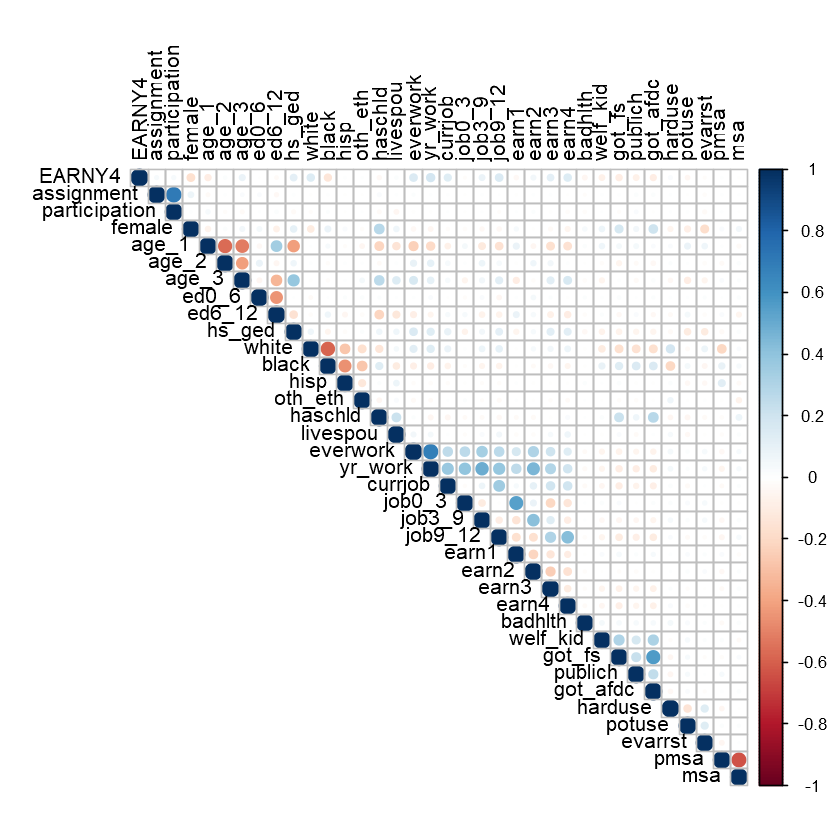

In [4]:
########################  Correlation Matrix  ########################

corr = cor(df)
corrplot(corr, type = "upper", tl.col = "black")

# Save correlation matrix as png-file
png(height=1200, width=1200, file="correlation.png")
    corrplot(corr, type = "upper", tl.col = "black")
dev.off()

## Prepare Data

In [5]:
########################  Extract Dataset  ########################

# Extracting Data 
data <- df %>% dplyr::select(all_variables)

# Setting up the data, renaming columns and discarding rows with NA (if any)
df <- bind_cols(data) %>%  na.omit()

# Add First Order Interactions
interactions <-model.matrix(~ (female + age_1 + age_2 + age_3 + ed0_6 + ed6_12 + hs_ged + white + black + hisp
                 + oth_eth + haschld + livespou + everwork + yr_work + currjob + job0_3 + job3_9 + job9_12
                 + earn1 + earn2 + earn3 + earn4 + badhlth + welf_kid + got_fs + publich + got_afdc
                 + harduse + potuse + evarrst + pmsa + msa)^2,df)
df <- cbind(df,interactions[,c(35:ncol(interactions))])

print('Data successfully extracted.')

########################  Partition the Samples  ########################

# Partition Hold-Out-Sample
df_part <- modelr::resample_partition(df, c(obs = 0.9, hold_out = 0.1))
df_obs <- as.data.frame(df_part$obs) # Training and estimation sample
df_hold_out <- as.data.frame(df_part$hold_out) # Hold-out-sample

# Partition Samples for Cross-Fitting
df_part <- modelr::resample_partition(df_obs, c(obs_A = 0.5, obs_B = 0.5))
df_obs_A <- as.data.frame(df_part$obs_A) # Sample A
df_obs_B <- as.data.frame(df_part$obs_B) # Sample B

# Partition Samples A and B for Honest Inference
df_part <- modelr::resample_partition(df_obs_A, c(obs_A_train = 0.5, obs_A_est = 0.5))
df_obs_A_train <- as.data.frame(df_part$obs_A_train) # Training Sample A
df_obs_A_est <- as.data.frame(df_part$obs_A_est) # Estimation Sample A
df_part <- modelr::resample_partition(df_obs_B, c(obs_B_train = 0.5, obs_B_est = 0.5))
df_obs_B_train <- as.data.frame(df_part$obs_B_train) # Training Sample B
df_obs_B_est <- as.data.frame(df_part$obs_B_est) # Estimation Sample B

print('Samples are partitioned.')

########################  Generate Variables  ########################

# Outcome
earnings_hold_out <- as.matrix(df_hold_out[,1])
earnings_obs <- as.matrix(df_obs[,1])
earnings_obs_A <- as.matrix(df_obs_A[,1])
earnings_obs_B <- as.matrix(df_obs_B[,1])
earnings_obs_A_train <- as.matrix(df_obs_A_train[,1])
earnings_obs_A_est <- as.matrix(df_obs_A_est[,1])
earnings_obs_B_train <- as.matrix(df_obs_B_train[,1])
earnings_obs_B_est <- as.matrix(df_obs_B_est[,1])

# Treatment
treat = 3 #Select treatmen 2= offer to participate, 3 = actual participation
treat_hold_out <- as.matrix(df_hold_out[,treat])
treat_obs <- as.matrix(df_obs[,treat])
treat_obs_A <- as.matrix(df_obs_A[,treat])
treat_obs_B <- as.matrix(df_obs_B[,treat])
treat_obs_A_train <- as.matrix(df_obs_A_train[,treat])
treat_obs_A_est <- as.matrix(df_obs_A_est[,treat])
treat_obs_B_train <- as.matrix(df_obs_B_train[,treat])
treat_obs_B_est <- as.matrix(df_obs_B_est[,treat])

# Covariates
covariates_hold_out <- as.matrix(df_hold_out[,c(4:ncol(df_hold_out))])
covariates_obs <- as.matrix(df_obs[,c(4:ncol(df_obs))])
covariates_obs_A <- as.matrix(df_obs_A[,c(4:ncol(df_obs_A))])
covariates_obs_B <- as.matrix(df_obs_B[,c(4:ncol(df_obs_B))])
covariates_obs_A_train <- as.matrix(df_obs_A_train[,c(4:ncol(df_obs_A_train))])
covariates_obs_A_est <- as.matrix(df_obs_A_est[,c(4:ncol(df_obs_A_est))])
covariates_obs_B_train <- as.matrix(df_obs_B_train[,c(4:ncol(df_obs_B_train))])
covariates_obs_B_est <- as.matrix(df_obs_B_est[,c(4:ncol(df_obs_B_est))])

print('The data is now ready for your analysis!')

[1] "Data successfully extracted."
[1] "Samples are partitioned."
[1] "The data is now ready for your analysis!"


# Nuisance Parameters

We use Lasso to estimate the nuisance parameters.

### Conditional Earnings

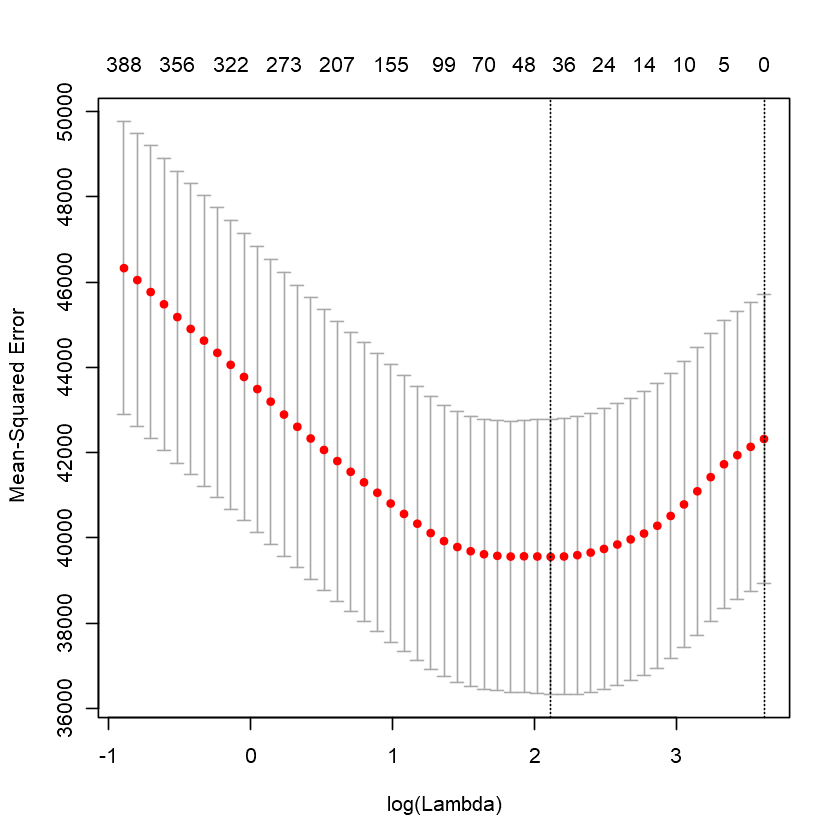

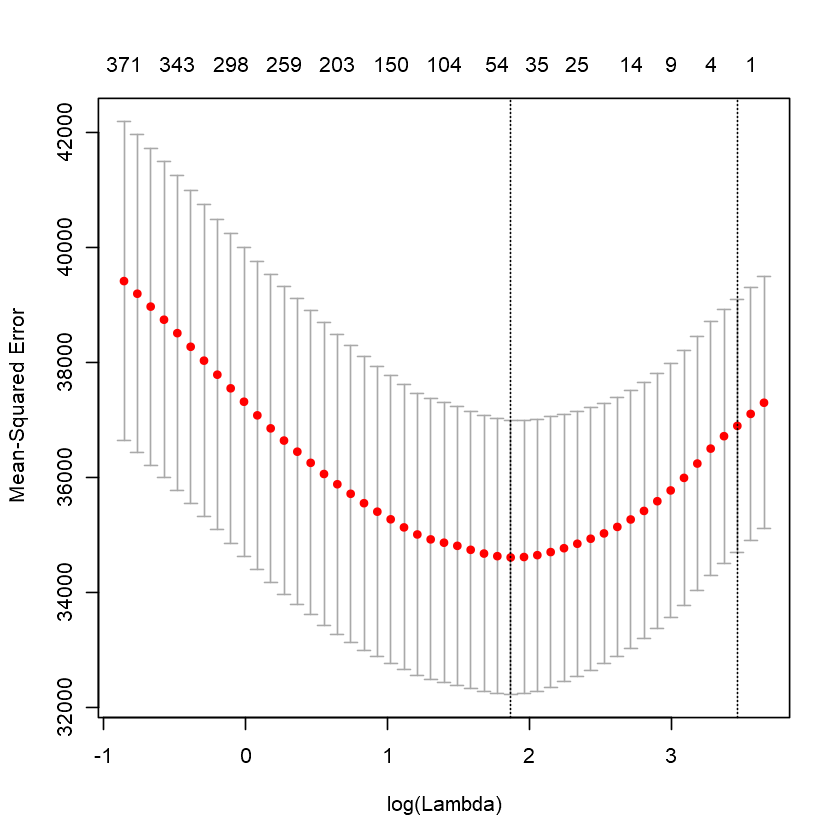

In [6]:
########################  Conditional Earnings  ########################
p = 1 # 1 for LASSO, 0 for Ridge
set.seed(100238)

# Using Sample A to Predict Sample B
lasso_y_A_train <- cv.glmnet(covariates_obs_A_train, earnings_obs_A_train, alpha=p, 
                             type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_y_A_train)
fit_y_A_est <- glmnet(covariates_obs_A_est, earnings_obs_A_est,lambda = lasso_y_A_train$lambda.min)
yhat_B <- predict(fit_y_A_est, covariates_obs_B, type = 'response')
yhat_B_train <- predict(fit_y_A_est, covariates_obs_B_train, type = 'response')
yhat_B_est <- predict(fit_y_A_est, covariates_obs_B_est, type = 'response')

# Using Sample B to Predict Sample A
lasso_y_B_train <- cv.glmnet(covariates_obs_B_train, earnings_obs_B_train, alpha=p, 
                             type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_y_B_train)
fit_y_B_est <- glmnet(covariates_obs_B_est, earnings_obs_B_est,lambda = lasso_y_B_train$lambda.min)
yhat_A <- predict(fit_y_B_est, covariates_obs_A, type = 'response')
yhat_A_train <- predict(fit_y_B_est, covariates_obs_A_train, type = 'response')
yhat_A_est <- predict(fit_y_B_est, covariates_obs_A_est, type = 'response')


### Conditional Potential Outcomes

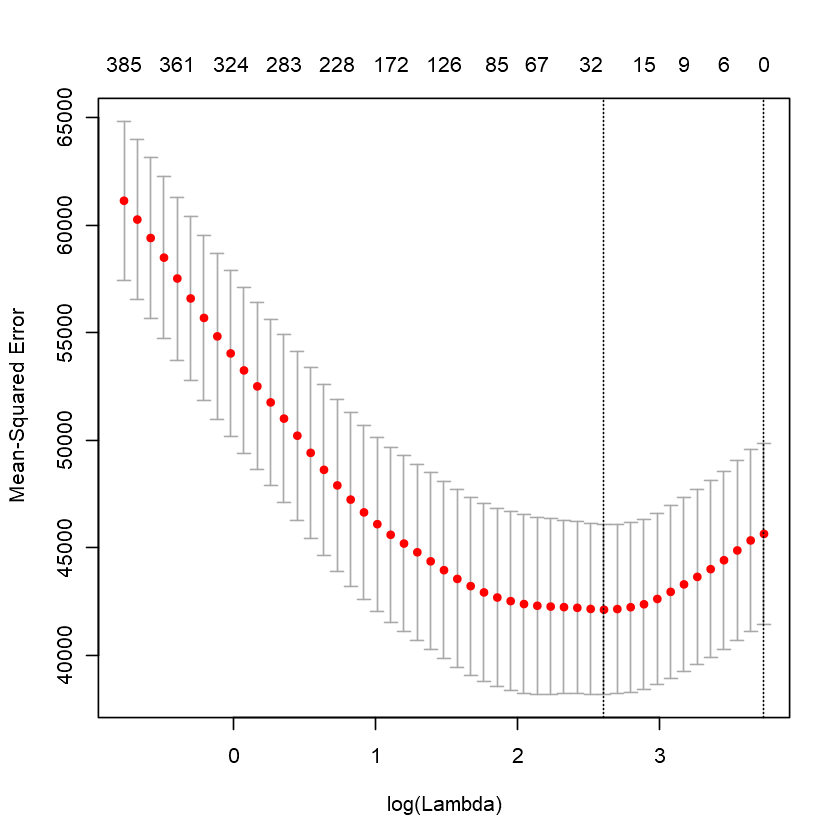

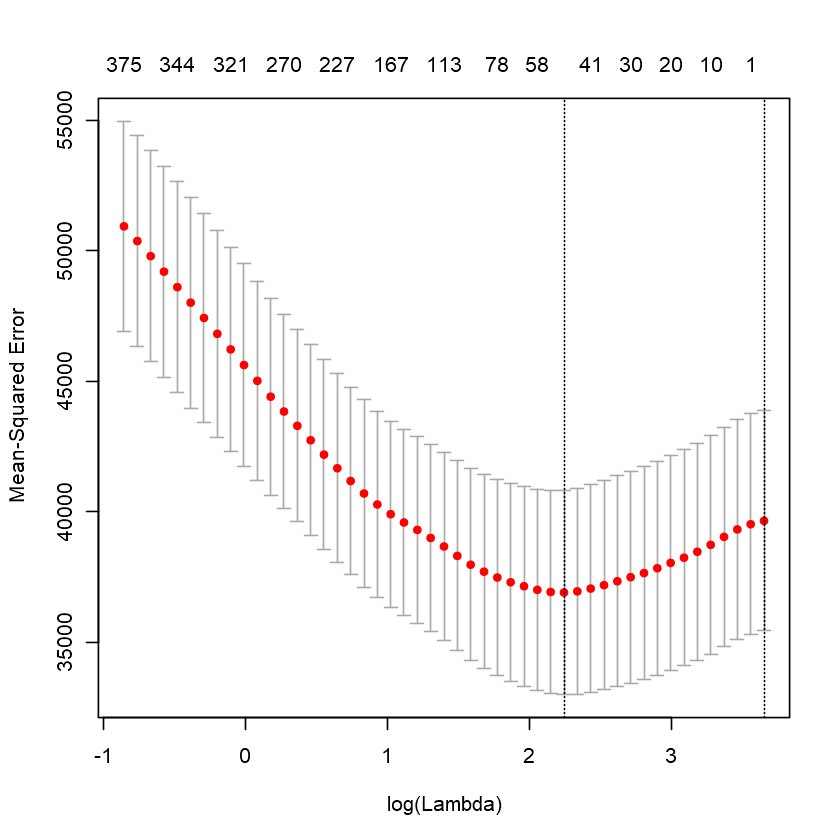

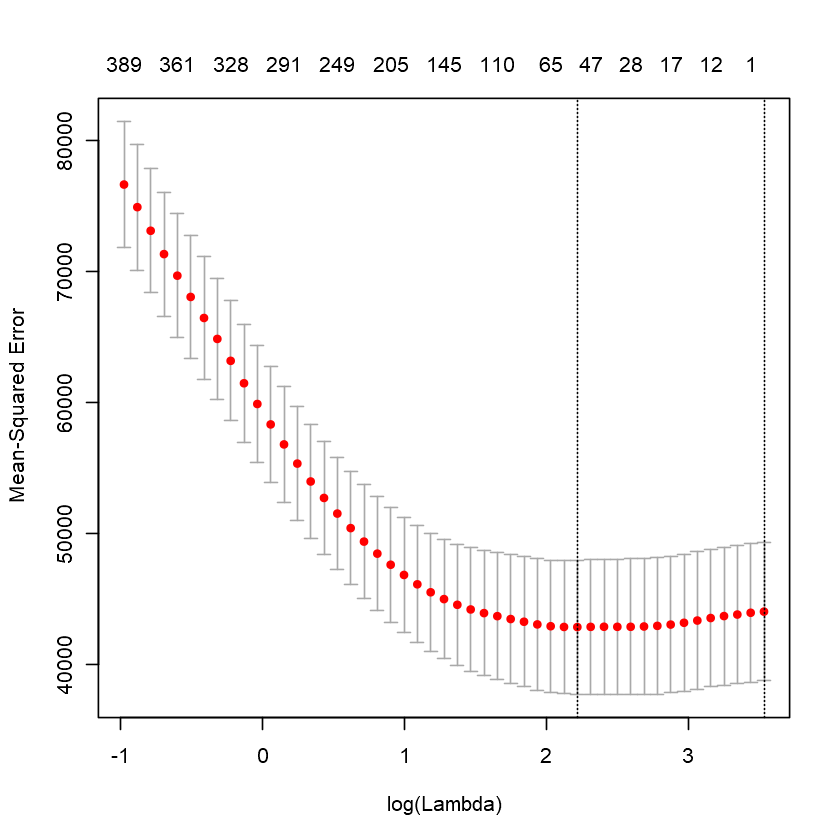

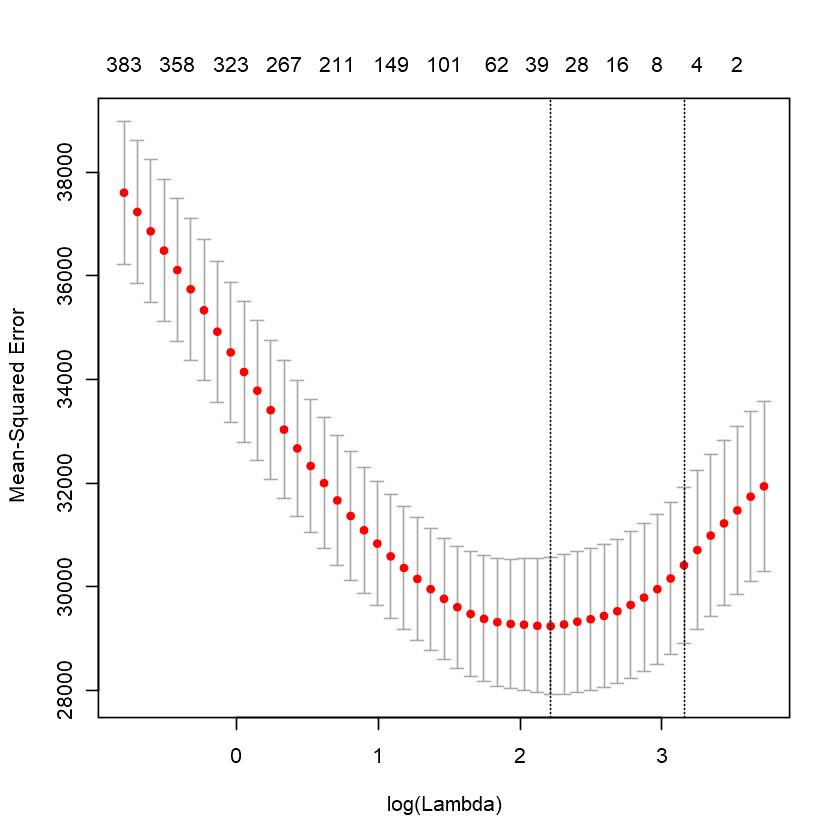

In [7]:
########################  Conditional Potential Earnings  ########################
p = 1 # 1 for LASSO, 0 for Ridge
set.seed(100237)

## Using Sample A to Predict Sample B
# Potential Earnings under Treatment
lasso_y1_A_train <- cv.glmnet(covariates_obs_A_train[treat_obs_A_train==1,], earnings_obs_A_train[treat_obs_A_train==1,],
                              alpha=p, type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_y1_A_train)
fit_y1_A_est <- glmnet(covariates_obs_A_est[treat_obs_A_est==1,], earnings_obs_A_est[treat_obs_A_est==1,]
                        ,lambda = lasso_y1_A_train$lambda.min)
y1hat_B <- predict(fit_y1_A_est, covariates_obs_B, type = 'response')
y1hat_B_train <- predict(fit_y1_A_est, covariates_obs_B_train, type = 'response')
y1hat_B_est <- predict(fit_y1_A_est, covariates_obs_B_est, type = 'response')

# Potential Earnings under Non-Treatment
lasso_y0_A_train <- cv.glmnet(covariates_obs_A_train[treat_obs_A_train==0,], earnings_obs_A_train[treat_obs_A_train==0,],
                              alpha=p, type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_y0_A_train)
fit_y0_A_est <- glmnet(covariates_obs_A_est[treat_obs_A_est==0,], earnings_obs_A_est[treat_obs_A_est==0,]
                        ,lambda = lasso_y0_A_train$lambda.min)
y0hat_B <- predict(fit_y0_A_est, covariates_obs_B, type = 'response')
y0hat_B_train <- predict(fit_y0_A_est, covariates_obs_B_train, type = 'response')
y0hat_B_est <- predict(fit_y0_A_est, covariates_obs_B_est, type = 'response')

## Using Sample B to Predict Sample A
# Potential Earnings under Treatment
lasso_y1_B_train <- cv.glmnet(covariates_obs_B_train[treat_obs_B_train==1,], earnings_obs_B_train[treat_obs_B_train==1,],
                              alpha=p, type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_y1_B_train)
fit_y1_B_est <- glmnet(covariates_obs_B_est[treat_obs_B_est==1,], earnings_obs_B_est[treat_obs_B_est==1,]
                        ,lambda = lasso_y1_B_train$lambda.min)
y1hat_A <- predict(fit_y1_B_est, covariates_obs_A, type = 'response')
y1hat_A_train <- predict(fit_y1_B_est, covariates_obs_A_train, type = 'response')
y1hat_A_est <- predict(fit_y1_B_est, covariates_obs_A_est, type = 'response')

# Potential Earnings under Non-Treatment
lasso_y0_B_train <- cv.glmnet(covariates_obs_B_train[treat_obs_B_train==0,], earnings_obs_B_train[treat_obs_B_train==0,],
                              alpha=p, type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_y0_B_train)
fit_y0_B_est <- glmnet(covariates_obs_B_est[treat_obs_B_est==0,], earnings_obs_B_est[treat_obs_B_est==0,]
                        ,lambda = lasso_y0_B_train$lambda.min)
y0hat_A <- predict(fit_y0_B_est, covariates_obs_A, type = 'response')
y0hat_A_train <- predict(fit_y0_B_est, covariates_obs_A_train, type = 'response')
y0hat_A_est <- predict(fit_y0_B_est, covariates_obs_A_est, type = 'response')

### Propensity Score

We use a Logit-Lasso to estimate the propensity score.

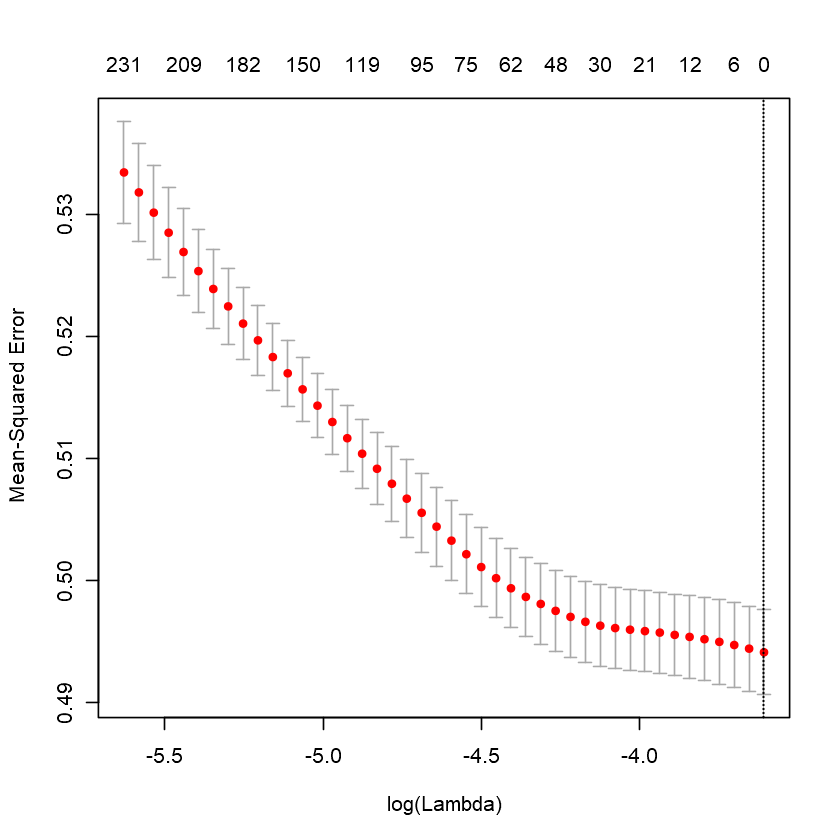

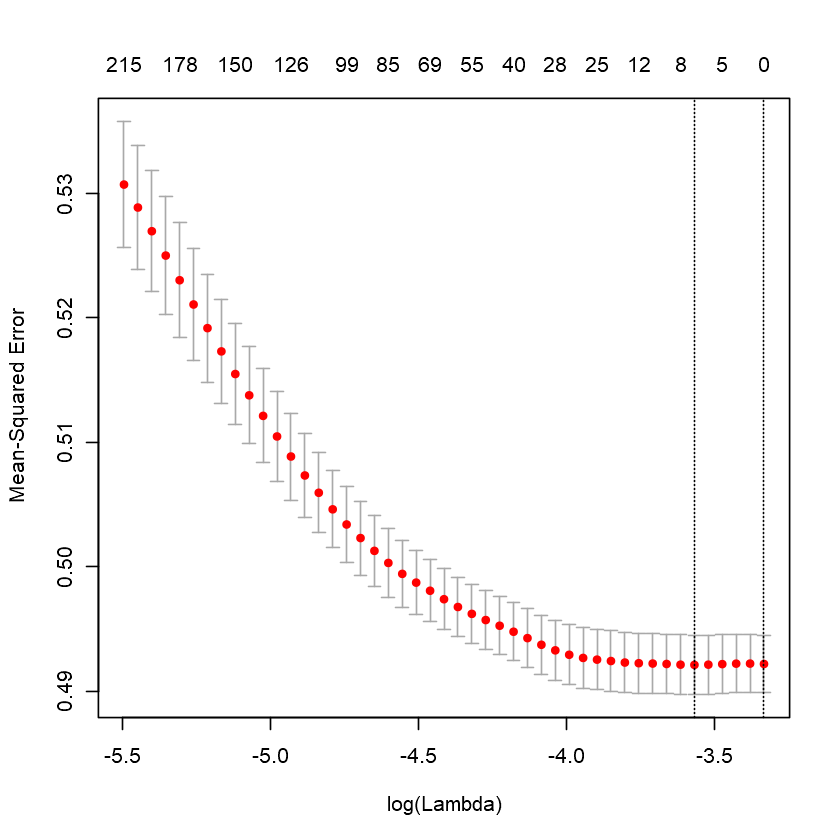

In [8]:
########################  Propensity Score  ########################
p = 1 # 1 for LASSO, 0 for Ridge
set.seed(100236)

# Using Sample A to Predict Sample B
lasso_p_A_train <- cv.glmnet(covariates_obs_A_train, treat_obs_A_train, alpha=p, type.measure = 'mse',
                             lambda.min.ratio = 0.1, nlambda = 50, family='binomial', parallel=FALSE)
plot(lasso_p_A_train)
fit_p_A_est <- glmnet(covariates_obs_A_est, treat_obs_A_est,lambda = lasso_p_A_train$lambda.min, family='binomial')
pscore_B <- predict(fit_p_A_est, covariates_obs_B, type = 'response')
pscore_B_train <- predict(fit_p_A_est, covariates_obs_B_train, type = 'response')
pscore_B_est <- predict(fit_p_A_est, covariates_obs_B_est, type = 'response')

# Using Sample B to Predict Sample A
lasso_p_B_train <- cv.glmnet(covariates_obs_B_train, treat_obs_B_train, alpha=p, type.measure = 'mse',
                             lambda.min.ratio = 0.1, nlambda = 50, family='binomial', parallel=FALSE)
plot(lasso_p_B_train)
fit_p_B_est <- glmnet(covariates_obs_B_est, treat_obs_B_est,lambda = lasso_p_B_train$lambda.min, family='binomial')
pscore_A <- predict(fit_p_B_est, covariates_obs_A, type = 'response')
pscore_A_train <- predict(fit_p_B_est, covariates_obs_A_train, type = 'response')
pscore_A_est <- predict(fit_p_B_est, covariates_obs_A_est, type = 'response')


# Modified Outcome Method

### Average Treatment Effects (ATEs)

We use the double machine learning approach to estimate ATEs.

In [9]:
########################  Average Treatment Effects (ATE)  ########################

# Generate Modified Outcome
Y_star_A = invisible(y1hat_A - y0hat_A + treat_obs_A*(earnings_obs_A - y1hat_A)/pscore_A 
            - (1-treat_obs_A)*(earnings_obs_A - y0hat_A)/(1-pscore_A))

Y_star_B = invisible(y1hat_B - y0hat_B + treat_obs_B*(earnings_obs_B - y1hat_B)/pscore_B 
            - (1-treat_obs_B)*(earnings_obs_B - y0hat_B)/(1-pscore_B))

Y_star = invisible(0.5*(mean(Y_star_A) + mean(Y_star_B)))

# Average Treatment Effect (ATE)
ATE <- round(mean(Y_star), digits=1)
psi_A <- Y_star_A- mean(Y_star_A)
psi_B <- Y_star_B- mean(Y_star_B)
SD_ATE <- round(sqrt(0.5*(var(psi_A) + (mean(Y_star_A) - mean(Y_star))^2)/nrow(psi_A) 
                     + 0.5*(var(psi_B) + (mean(Y_star_B) - mean(Y_star))^2)/nrow(psi_B)),digits=1)
print(paste0("Average Treatment Effect (ATE): ", ATE))
print(paste0("Standard Error for ATE: ", SD_ATE))

# Variance estimator (more) robust to outliers
var_A <-(quantile(psi_A,pnorm(1, mean = 0, sd = 1)) - quantile(psi_A,pnorm(-1, mean = 0, sd = 1)))/2
var_B <-(quantile(psi_B,pnorm(1, mean = 0, sd = 1)) - quantile(psi_B,pnorm(-1, mean = 0, sd = 1)))/2
SD_ATE <- round(sqrt(0.5*(var_A^2 + (mean(Y_star_A) - mean(Y_star))^2)/nrow(psi_A) 
                     + 0.5*(var_B^2 + (mean(Y_star_B) - mean(Y_star))^2)/nrow(psi_B)),digits=1)
print(paste0("Outlier Robust Standard Error for ATE: ", SD_ATE))


# Compare results with OLS on full sample
ols <- lm(formula = EARNY4 ~ assignment, data = df)
summary(ols)

[1] "Average Treatment Effect (ATE): 14.6"
[1] "Standard Error for ATE: 5.5"
[1] "Outlier Robust Standard Error for ATE: 4.9"



Call:
lm(formula = EARNY4 ~ assignment, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-209.28 -168.18  -23.33  100.16 2212.68 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  197.233      3.010  65.525  < 2e-16 ***
assignment    12.046      3.891   3.096  0.00197 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 195.6 on 10514 degrees of freedom
Multiple R-squared:  0.0009107,	Adjusted R-squared:  0.0008157 
F-statistic: 9.584 on 1 and 10514 DF,  p-value: 0.001968


### Conditional Average Treatment Effects (CATEs)

We apply a Lasso on the score to predicte the CATEs.

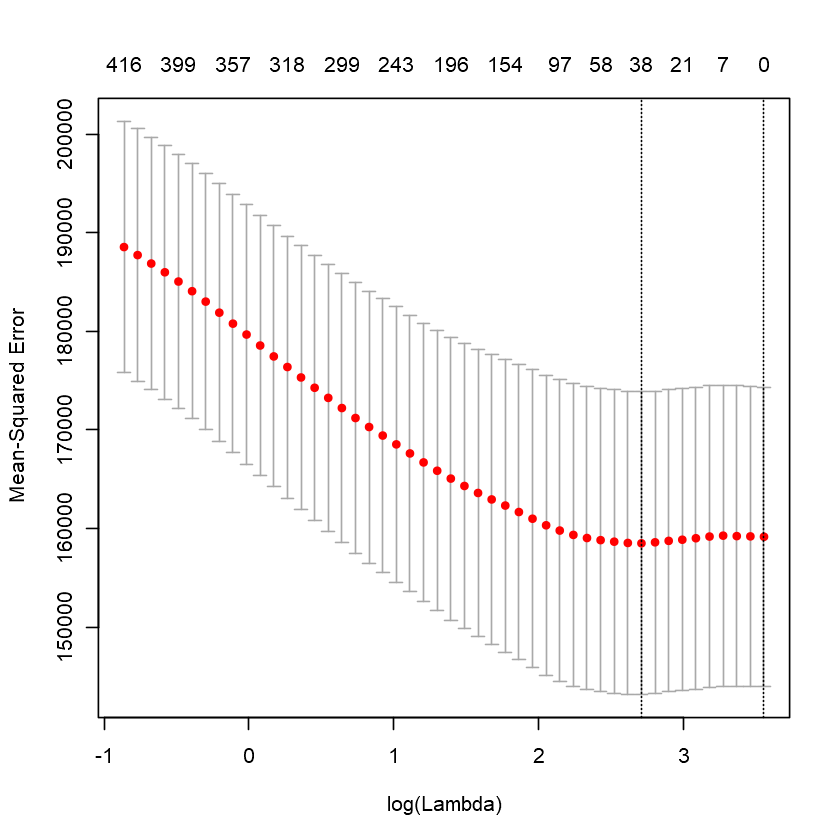

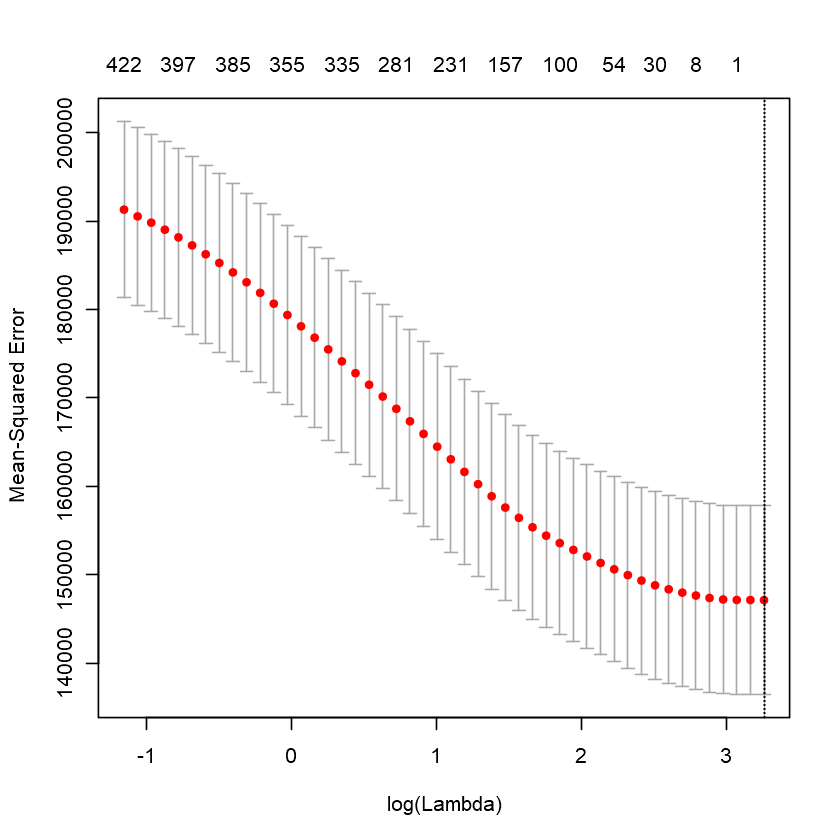

In [10]:
########################  Conditional Average Treatment Effects (CATE)  ########################
p = 1 # 1 for LASSO, 0 for Ridge
set.seed(100235)

# Generate Modified Outcome in Training and Estimation Samples
Y_star_A_train = invisible(y1hat_A_train - y0hat_A_train + treat_obs_A_train*(earnings_obs_A_train - y1hat_A_train)/pscore_A_train 
            - (1-treat_obs_A_train)*(earnings_obs_A_train - y0hat_A_train)/(1-pscore_A_train))
Y_star_A_est = invisible(y1hat_A_est - y0hat_A_est + treat_obs_A_est*(earnings_obs_A_est - y1hat_A_est)/pscore_A_est 
            - (1-treat_obs_A_est)*(earnings_obs_A_est - y0hat_A_est)/(1-pscore_A_est))

Y_star_B_train = invisible(y1hat_B_train - y0hat_B_train + treat_obs_B_train*(earnings_obs_B_train - y1hat_B_train)/pscore_B_train 
            - (1-treat_obs_B_train)*(earnings_obs_B_train - y0hat_B_train)/(1-pscore_B_train))
Y_star_B_est = invisible(y1hat_B_est - y0hat_B_est + treat_obs_B_est*(earnings_obs_B_est - y1hat_B_est)/pscore_B_est 
            - (1-treat_obs_B_est)*(earnings_obs_B_est - y0hat_B_est)/(1-pscore_B_est))

## Using Sample A 
lasso_cate1_A_train <- cv.glmnet(covariates_obs_A_train, Y_star_A_train, alpha=p, 
                                type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_cate1_A_train)
fit_cate1_A_est <- glmnet(covariates_obs_A_est, Y_star_A_est ,lambda = lasso_cate1_A_train$lambda.min)
cate1_hat_A <- predict(fit_cate1_A_est, covariates_obs, type = 'response')
cate1_hat_A_hold_out <- predict(fit_cate1_A_est, covariates_hold_out, type = 'response')

## Using Sample B 
lasso_cate1_B_train <- cv.glmnet(covariates_obs_B_train, Y_star_B_train, alpha=p, 
                                type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_cate1_B_train)
fit_cate1_B_est <- glmnet(covariates_obs_B_est, Y_star_B_est ,lambda = lasso_cate1_B_train$lambda.min)
cate1_hat_B <- predict(fit_cate1_B_est, covariates_obs, type = 'response')
cate1_hat_B_hold_out <- predict(fit_cate1_B_est, covariates_hold_out, type = 'response')

# Merge estimates from both samples
cate1_hat = 0.5*(cate1_hat_A + cate1_hat_B)
cate1_hold_out = 0.5*(cate1_hat_A_hold_out + cate1_hat_B_hold_out)


### Distribution of Predicted CATEs

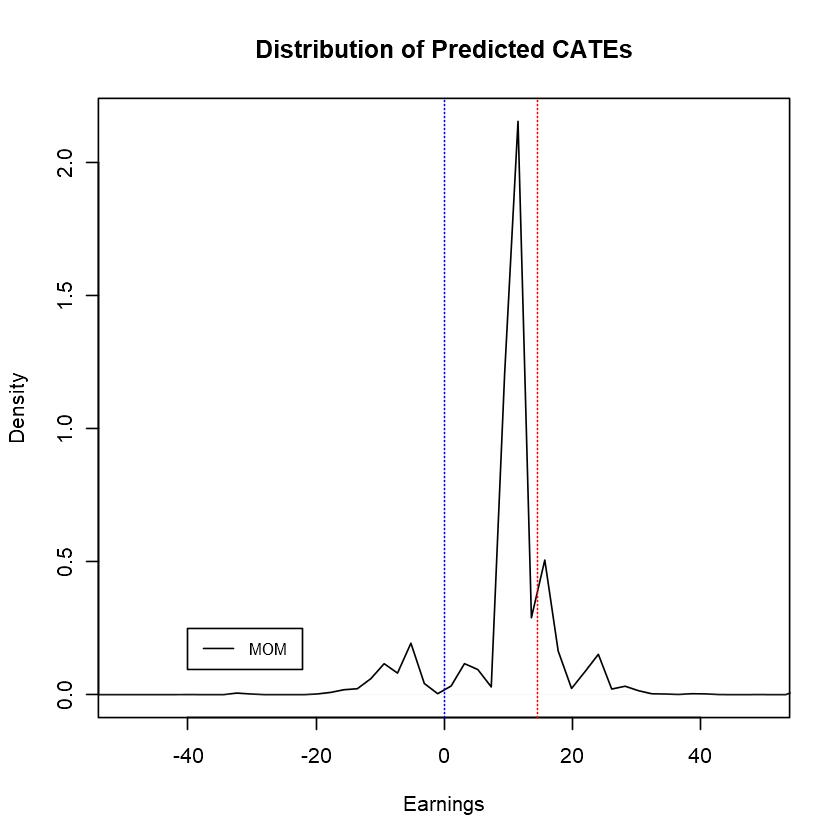

In [11]:
########################  Plot Distribution of Predicted CATEs  ########################

d1 <- density(cate1_hat)
plot(d1, main="Distribution of Predicted CATEs", xlim=c(-50, 50), xlab = "Earnings")
abline(v=c(0,ATE), col=c("blue", "red"), lty=c(3,3), lwd=c(1, 1))
legend(-40,.25, legend=c("MOM"), lty=c(1), cex=0.8)

### Quartiles of Predicted CATEs

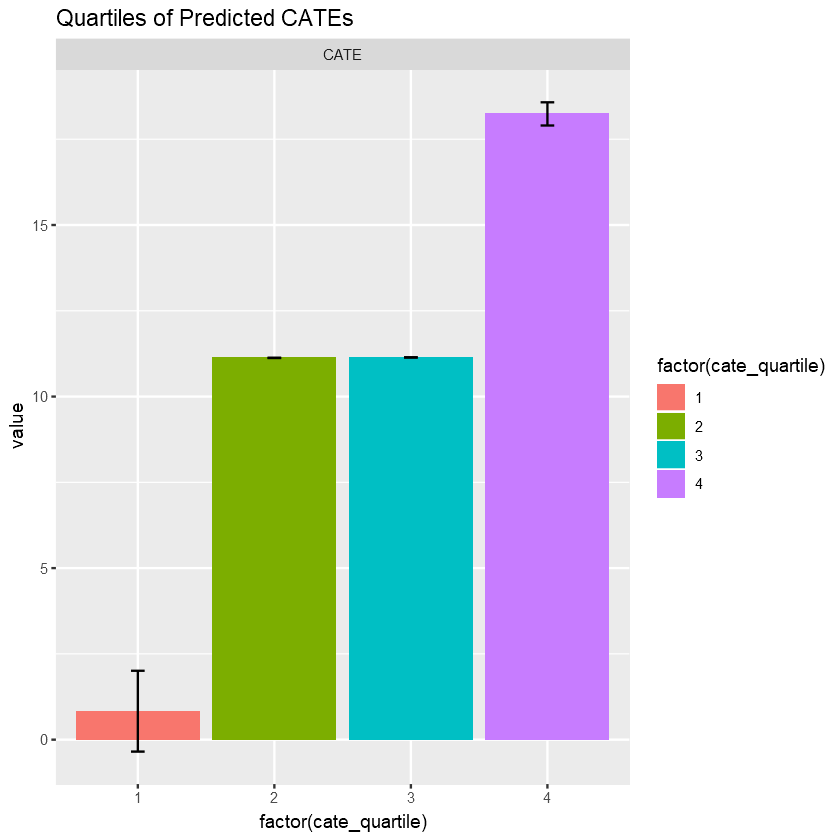

In [25]:
########################  Quartiles of Predicted CATEs  ########################
# Code based on Athey and Imbens, 2018, AEA lecture

colnames(cate1_hat) <- "CATE"
cate1_hat <- as.data.frame(cate1_hat)
mom_quartile <- cate1_hat %>%
            dplyr::select(c("CATE")) %>%
            dplyr::mutate(cate_quartile = ntile(cate1_hat, n=4))

m <- mom_quartile %>% group_by(cate_quartile) %>% summarize_all(mean) %>% melt(id="cate_quartile")
s <- mom_quartile %>% group_by(cate_quartile) %>% summarize_all(~sqrt(var(.)/(length(.)-1))) %>% melt(id="cate_quartile")
limits <- aes(ymax = m[,"value"] + 1.96*s[,"value"], ymin=m[,"value"] - 1.96*s[,"value"])

m %>% ggplot(aes(x=factor(cate_quartile), y=value)) +
      facet_wrap(~variable, nrow = 2) + 
      geom_bar(aes(fill=factor(cate_quartile)), stat="identity") +
      geom_errorbar(limits, width=.1) + 
      ggtitle("Quartiles of Predicted CATEs") 


### Covariate Values Across Predicted CATE Quartiles

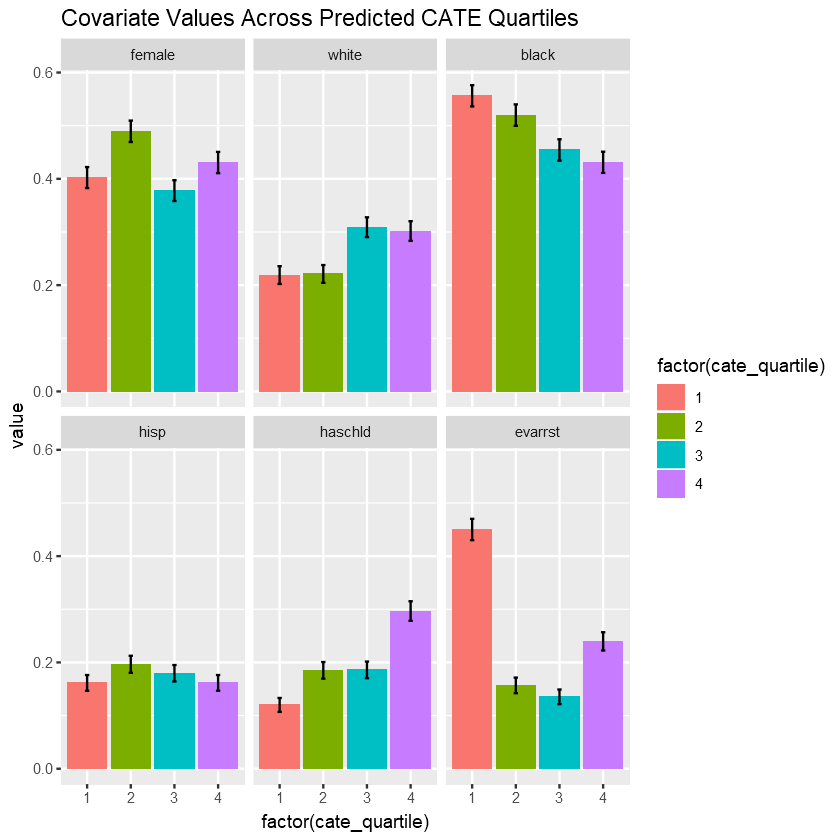

In [13]:
########################  Covariate Values Across Predicted CATE Quartiles  ########################
# Code based on Athey and Imbens, 2018, AEA lecture

mom2_quartile <- df_obs %>%
            dplyr::select(c("female", "white", "black", "hisp", "haschld", "evarrst")) %>%
            dplyr::mutate(cate_quartile = ntile(cate1_hat, n=4))

m <- mom2_quartile %>% group_by(cate_quartile) %>% summarize_all(mean) %>% melt(id="cate_quartile")
s <- mom2_quartile %>% group_by(cate_quartile) %>% summarize_all(~sqrt(var(.)/(length(.)-1))) %>% melt(id="cate_quartile")
limits <- aes(ymax = m[,"value"] + 1.96*s[,"value"], ymin=m[,"value"] - 1.96*s[,"value"])

m %>% ggplot(aes(x=factor(cate_quartile), y=value)) +
      facet_wrap(~variable, nrow = 2) + 
      geom_bar(aes(fill=factor(cate_quartile)), stat="identity") +
      geom_errorbar(limits, width=.1) + 
      ggtitle("Covariate Values Across Predicted CATE Quartiles") 

### Out-of-Sample Performance

We calculate the average treatment effects in the group with the 25% lowest and highest predicted CATEs. We expect that the spread between the lower and upper quartile is high when the ML algorithm succesfully identifies individuals with low and high CATEs. Having said that, this is obviously a subjective measure of the out-of-sample performance and has to be interpreted with caution. 

In [14]:
########################  Out-of-Sample Performance  ########################

low1 <- round((mean(earnings_hold_out[treat_hold_out == 1 & cate1_hold_out <= quantile(cate1_hold_out,.25)])
            - mean(earnings_hold_out[treat_hold_out == 0 & cate1_hold_out <= quantile(cate1_hold_out,.25)])), digits = 2)
high1 <- round((mean(earnings_hold_out[treat_hold_out == 1 & cate1_hold_out > quantile(cate1_hold_out,.75)])
            - mean(earnings_hold_out[treat_hold_out == 0 & cate1_hold_out > quantile(cate1_hold_out,.75)])), digits = 2)

print("Average Effect in Hold-Out-Sample")
print(paste0("for the 25% with the lowest predicted CATEs: ", low1))
print(paste0("for the 25% with the highest predicted CATEs: ", high1))
print(paste0("Spread: ", high1 - low1 ))

[1] "Average Effect in Hold-Out-Sample"
[1] "for the 25% with the lowest predicted CATEs: 1.51"
[1] "for the 25% with the highest predicted CATEs: 39.24"
[1] "Spread: 37.73"


# Modified Covariate Methods with Efficiency Augmentation

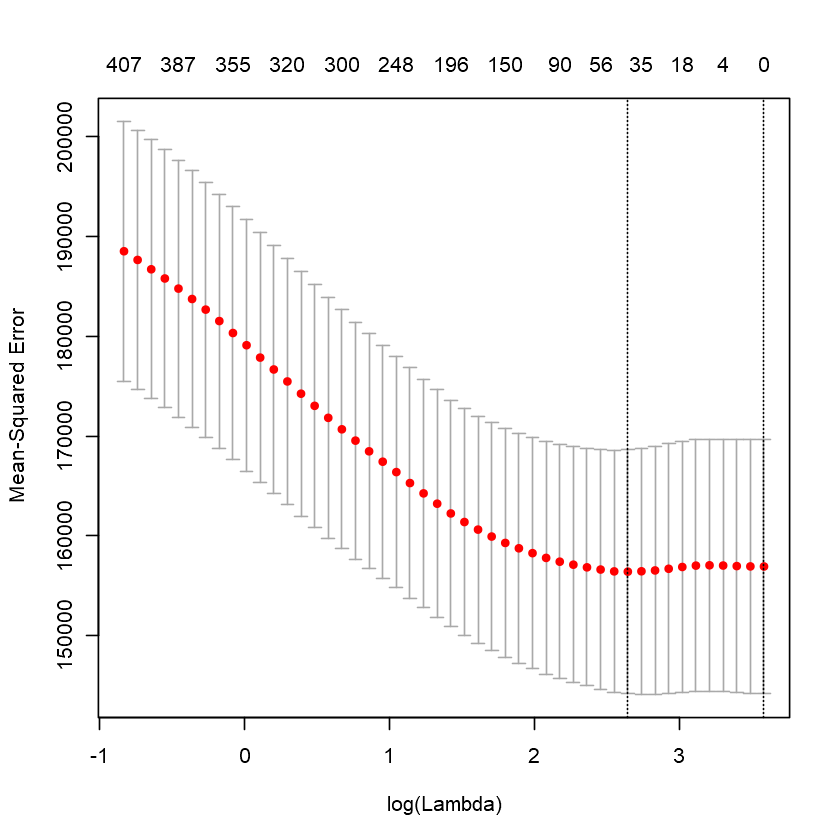

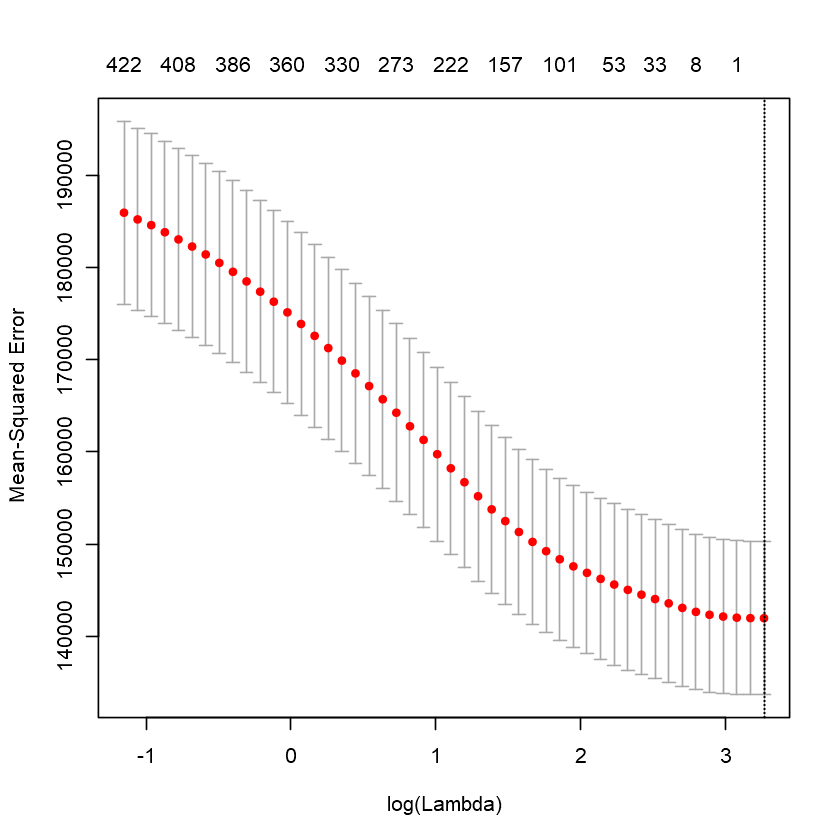

In [15]:
########################  Modified Covariate Method (MCM)  ########################
p = 1 # 1 for LASSO, 0 for Ridge
set.seed(100233)

# Generate Modified Outcome in Training and Estimation Samples
T_A_train = invisible(2*treat_obs_A_train -1)
T_B_train = invisible(2*treat_obs_B_train -1)
Y_mcm_A_train = invisible(2*T_A_train*(earnings_obs_A_train - yhat_A_train))
Y_mcm_B_train = invisible(2*T_B_train*(earnings_obs_B_train - yhat_B_train))
W_mcm_obs_A_train = invisible(T_A_train*(treat_obs_A_train-pscore_A_train)
                              /(4*pscore_A_train*(1-pscore_A_train)))
W_mcm_obs_B_train = invisible(T_B_train*(treat_obs_B_train-pscore_B_train)
                             /(4*pscore_B_train*(1-pscore_B_train)))

T_A_est = invisible(2*treat_obs_A_est -1)
T_B_est = invisible(2*treat_obs_B_est -1)
Y_mcm_A_est = invisible(2*T_A_est*(earnings_obs_A_est - yhat_A_est))
Y_mcm_B_est = invisible(2*T_B_est*(earnings_obs_B_est - yhat_B_est))
W_mcm_obs_A_est = invisible(T_A_est*(treat_obs_A_est-pscore_A_est)
                              /(4*pscore_A_est*(1-pscore_A_est)))
W_mcm_obs_B_est = invisible(T_B_est*(treat_obs_B_est-pscore_B_est)
                             /(4*pscore_B_est*(1-pscore_B_est)))

## Using Sample A 
lasso_cate2_A_train <- cv.glmnet(covariates_obs_A_train, Y_mcm_A_train, weights = W_mcm_obs_A_train,
                                 alpha=p, type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_cate2_A_train)
fit_cate2_A_est <- glmnet(covariates_obs_A_est, Y_mcm_A_est, weights = W_mcm_obs_A_est ,lambda = lasso_cate2_A_train$lambda.min)
cate2_hat_A <- predict(fit_cate2_A_est, covariates_obs, type = 'response')
cate2_hat_A_hold_out <- predict(fit_cate2_A_est, covariates_hold_out, type = 'response')


## Using Sample B 
lasso_cate2_B_train <- cv.glmnet(covariates_obs_B_train, Y_mcm_B_train, weights = W_mcm_obs_B_train,
                                 alpha=p, type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_cate2_B_train)
fit_cate2_B_est <- glmnet(covariates_obs_B_est, Y_mcm_B_est, weights = W_mcm_obs_B_est ,lambda = lasso_cate2_B_train$lambda.min)
cate2_hat_B <- predict(fit_cate2_B_est, covariates_obs, type = 'response')
cate2_hat_B_hold_out <- predict(fit_cate2_B_est, covariates_hold_out, type = 'response')

# Merge estimates from both samples
cate2_hat = 0.5*(cate2_hat_A + cate2_hat_B)
cate2_hold_out = 0.5*(cate2_hat_A_hold_out + cate2_hat_B_hold_out)


### Distribution of Predicted CATEs

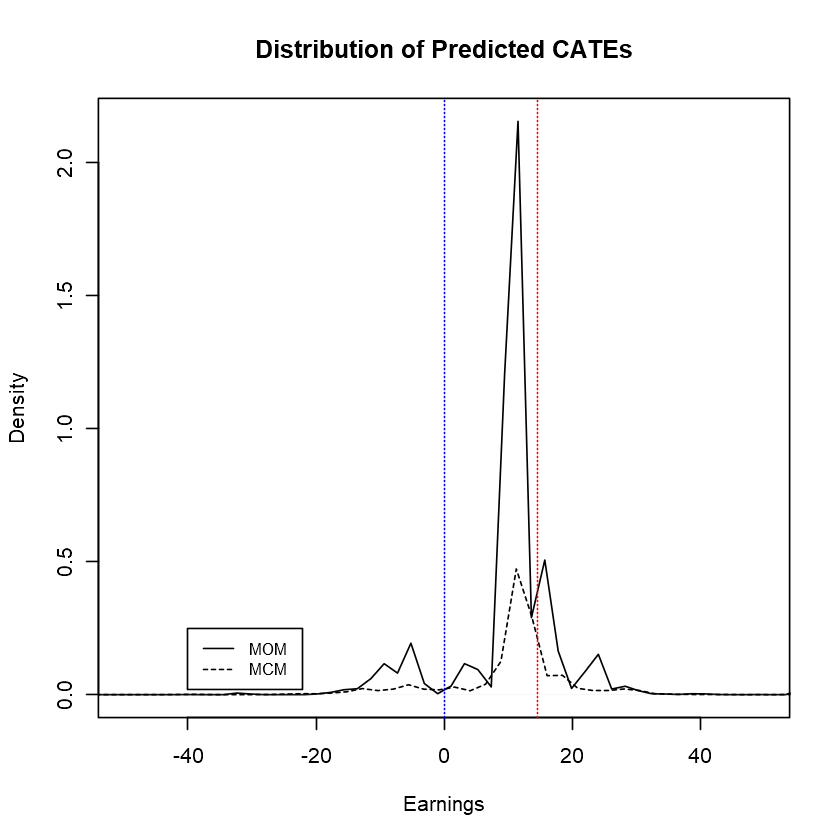

In [16]:
########################  Plot Distribution of Predicted CATEs  ########################

d2 <- density(cate2_hat)
plot(d1, main="Distribution of Predicted CATEs", xlim=c(-50, 50), xlab = "Earnings")
lines(d2, lty=2)
abline(v=c(0,ATE), col=c("blue", "red"), lty=c(3,3), lwd=c(1, 1))
legend(-40,.25, legend=c("MOM", "MCM"), lty=c(1,2), cex=0.8)

### Out-of-Sample Performance

In [17]:
########################  Out-of-Sample Performance  ########################

low2 <- round((mean(earnings_hold_out[treat_hold_out == 1 & cate2_hold_out <= quantile(cate2_hold_out,.25)])
            - mean(earnings_hold_out[treat_hold_out == 0 & cate2_hold_out <= quantile(cate2_hold_out,.25)])), digits = 2)
high2 <- round((mean(earnings_hold_out[treat_hold_out == 1 & cate2_hold_out > quantile(cate2_hold_out,.75)])
            - mean(earnings_hold_out[treat_hold_out == 0 & cate2_hold_out > quantile(cate2_hold_out,.75)])), digits = 2)

print("Average Effect in Hold-Out-Sample")
print(paste0("for the 25% with the lowest predicted CATEs: ", low2))
print(paste0("for the 25% with the highest predicted CATEs: ", high2))
print(paste0("Spread: ", high2 - low2 ))

[1] "Average Effect in Hold-Out-Sample"
[1] "for the 25% with the lowest predicted CATEs: 5.77"
[1] "for the 25% with the highest predicted CATEs: 41.85"
[1] "Spread: 36.08"


# R-learning

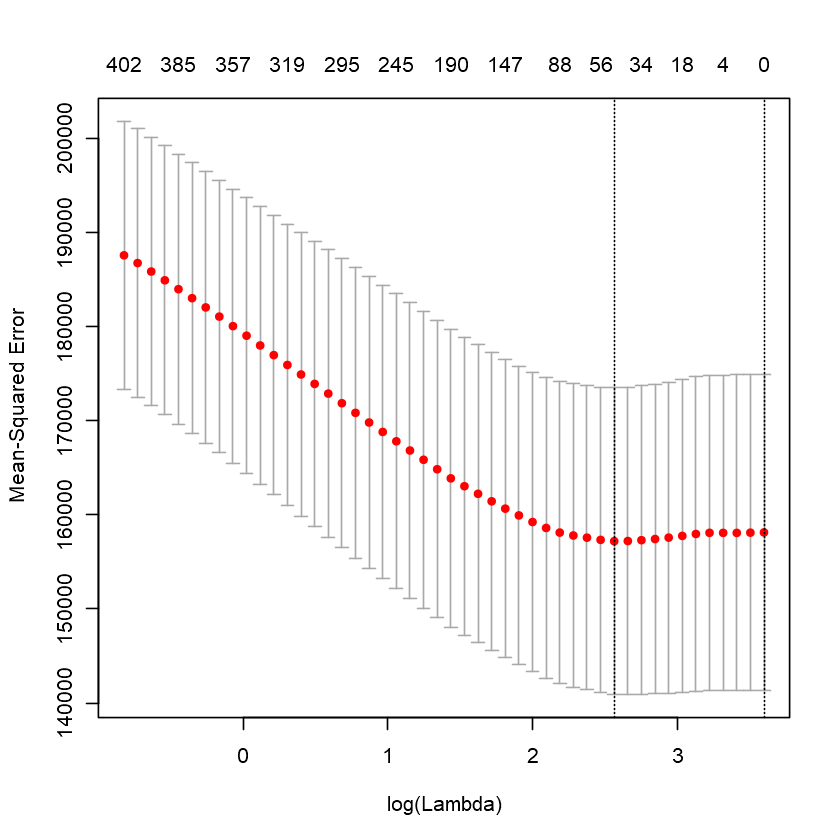

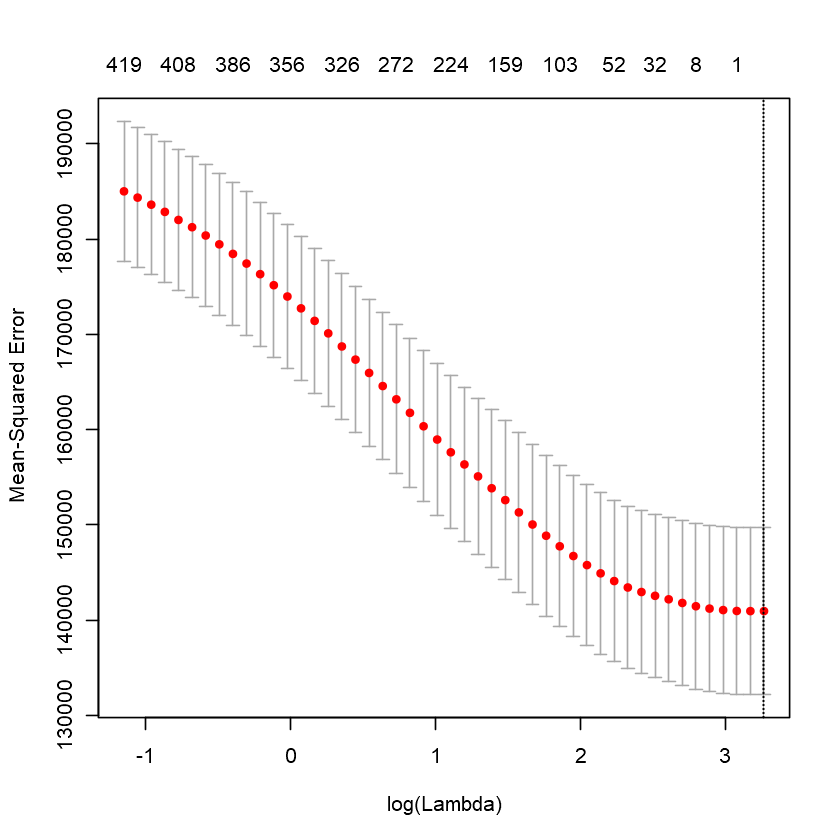

In [18]:
########################  R-learning  ########################
p = 1 # 1 for LASSO, 0 for Ridge
set.seed(100240)

# Generate Modified Outcome and Weights in Training and Estimation Samples
Y_R_A_train = invisible((earnings_obs_A_train - yhat_A_train)/(treat_obs_A_train-pscore_A_train))
Y_R_B_train = invisible((earnings_obs_B_train - yhat_B_train)/(treat_obs_B_train-pscore_B_train))
W_R_obs_A_train = invisible((treat_obs_A_train-pscore_A_train)^2)
W_R_obs_B_train = invisible((treat_obs_B_train-pscore_B_train)^2)

Y_R_A_est = invisible((earnings_obs_A_est - yhat_A_est)/(treat_obs_A_est-pscore_A_est))
Y_R_B_est = invisible((earnings_obs_B_est - yhat_B_est)/(treat_obs_B_est-pscore_B_est))
W_R_obs_A_est = invisible((treat_obs_A_est-pscore_A_est)^2)
W_R_obs_B_est = invisible((treat_obs_B_est-pscore_B_est)^2)

## Using Sample A 
lasso_cate3_A_train <- cv.glmnet(covariates_obs_A_train, Y_R_A_train, weights = W_R_obs_A_train,
                                 alpha=p, type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_cate3_A_train)
fit_cate3_A_est <- glmnet(covariates_obs_A_est, Y_R_A_est, weights = W_R_obs_A_est ,lambda = lasso_cate3_A_train$lambda.min)
cate3_hat_A <- predict(fit_cate3_A_est, covariates_obs, type = 'response')
cate3_hat_A_hold_out <- predict(fit_cate3_A_est, covariates_hold_out, type = 'response')


## Using Sample B 
lasso_cate3_B_train <- cv.glmnet(covariates_obs_B_train, Y_R_B_train, weights = W_R_obs_B_train,
                                 alpha=p, type.measure = 'mse', lambda.min.ratio = 0.01, nlambda = 50, parallel=FALSE)
plot(lasso_cate3_B_train)
fit_cate3_B_est <- glmnet(covariates_obs_B_est, Y_R_B_est, weights = W_R_obs_B_est ,lambda = lasso_cate3_B_train$lambda.min)
cate3_hat_B <- predict(fit_cate3_B_est, covariates_obs, type = 'response')
cate3_hat_B_hold_out <- predict(fit_cate3_B_est, covariates_hold_out, type = 'response')

# Merge estimates from both samples
cate3_hat = 0.5*(cate3_hat_A + cate3_hat_B)
cate3_hold_out = 0.5*(cate3_hat_A_hold_out + cate3_hat_B_hold_out)


### Distribution of Predicted CATEs

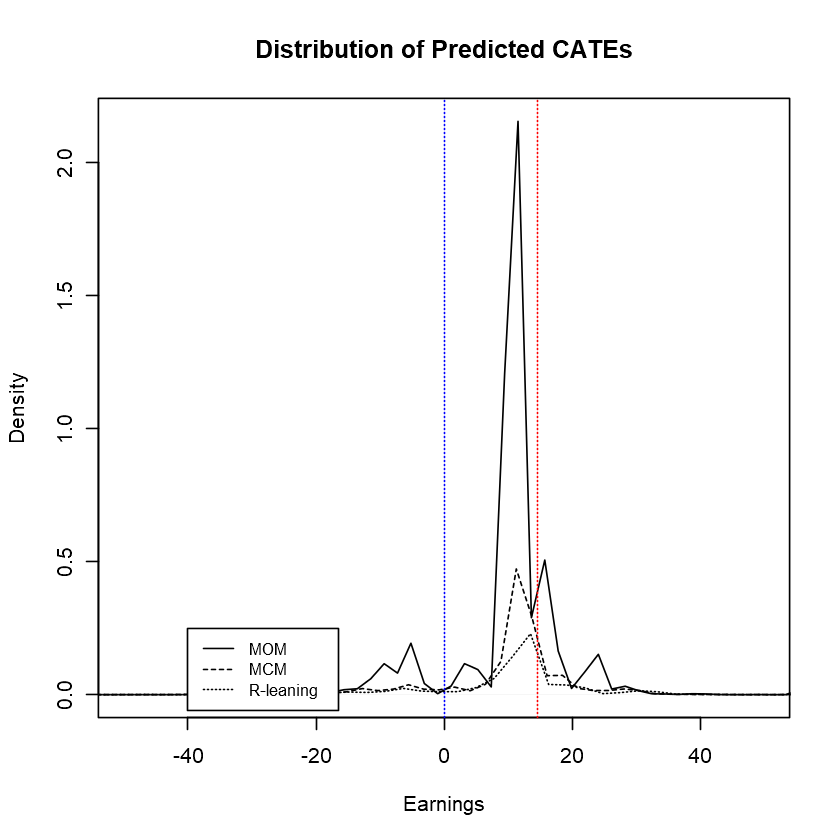

In [19]:
########################  Plot Distribution of Predicted CATEs  ########################

d3 <- density(cate3_hat)
plot(d1, main="Distribution of Predicted CATEs", xlim=c(-50, 50), xlab = "Earnings")
lines(d2, lty=2)
lines(d3, lty=3)
abline(v=c(0,ATE), col=c("blue", "red"), lty=c(3,3), lwd=c(1, 1))
legend(-40,.25, legend=c("MOM", "MCM", "R-leaning"), lty=c(1,2,3), cex=0.8)

### Out-of-Sample Performance

In [20]:
########################  Out-of-Sample Performance  ########################

low3 <- round((mean(earnings_hold_out[treat_hold_out == 1 & cate3_hold_out <= quantile(cate3_hold_out,.25)])
            - mean(earnings_hold_out[treat_hold_out == 0 & cate3_hold_out <= quantile(cate3_hold_out,.25)])), digits = 2)
high3 <- round((mean(earnings_hold_out[treat_hold_out == 1 & cate3_hold_out > quantile(cate3_hold_out,.75)])
            - mean(earnings_hold_out[treat_hold_out == 0 & cate3_hold_out > quantile(cate3_hold_out,.75)])), digits = 2)

print("Average Effect in Hold-Out-Sample")
print(paste0("for the 25% with the lowest predicted CATEs: ", low3))
print(paste0("for the 25% with the highest predicted CATEs: ", high3))
print(paste0("Spread: ", high3 - low3 ))

[1] "Average Effect in Hold-Out-Sample"
[1] "for the 25% with the lowest predicted CATEs: 2.45"
[1] "for the 25% with the highest predicted CATEs: 35.98"
[1] "Spread: 33.53"


# Causal Forest with Local Centering

In [21]:
########################  Causal Forest Estimator  ######################## 
set.seed(100241)

# Tuning parameters
min_tree = 20
num_trees = 100 # Use at least 1,000 trees
cov_frac = 2/3
sample_part= 0.5

# Build causal forest
# Hoensty and local centering is automatically implemented
cf <- causal_forest(covariates_obs, earnings_obs,treat_obs, sample.fraction = sample_part, 
                  mtry = floor(cov_frac*ncol(covariates_obs)), Y.hat = NULL, W.hat = NULL,
                  num.trees = num_trees, min.node.size = min_tree,
                  honesty = TRUE, honesty.fraction = 0.5)

cf_obs <- predict(cf, covariates_obs)
cf_hold_out <- predict(cf, covariates_hold_out)

cate4_hat = cf_obs$predictions
cate4_hold_out = cf_hold_out$predictions

print("Causal Forest was built.")

[1] "Causal Forest was built."


### Distribution of Predicted CATEs

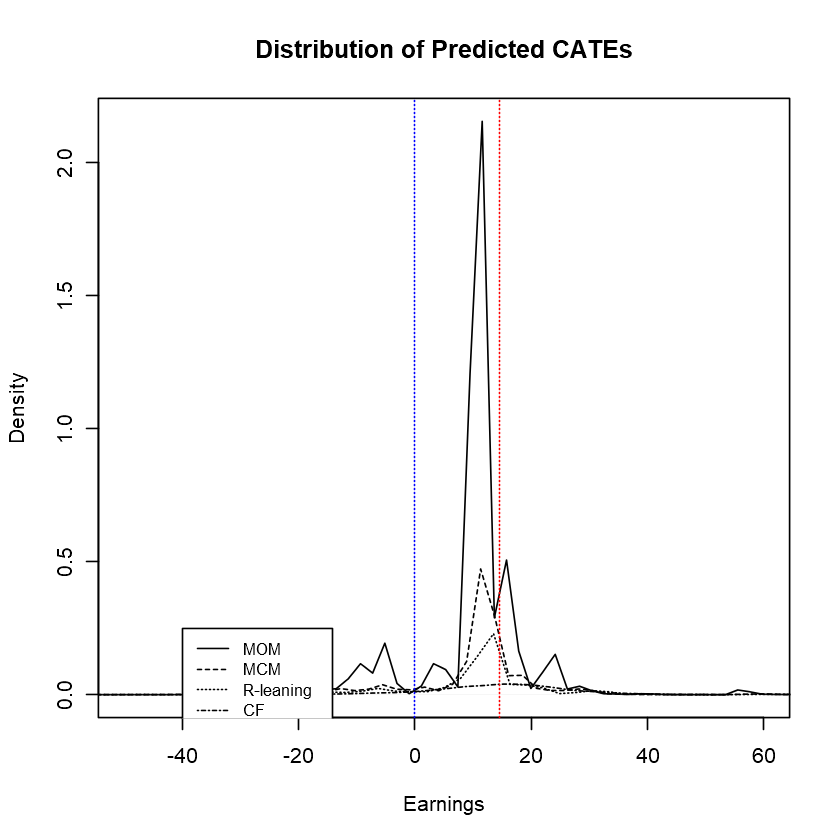

In [22]:
########################  Plot Distribution of Predicted CATEs  ########################

d4 <- density(cate4_hat)
plot(d1, main="Distribution of Predicted CATEs", xlim=c(-50, 60), xlab = "Earnings")
lines(d2, lty=2)
lines(d3, lty=3)
lines(d4, lty=4)
abline(v=c(0,ATE), col=c("blue", "red"), lty=c(3,3), lwd=c(1, 1))
legend(-40,.25, legend=c("MOM", "MCM", "R-leaning", "CF"), lty=c(1,2,3,4), cex=0.8)

### Out-of-Sample Performance

In [23]:
########################  Out-of-Sample Performance  ########################

low4 <- round((mean(earnings_hold_out[treat_hold_out == 1 & cate4_hold_out <= quantile(cate4_hold_out,.25)])
            - mean(earnings_hold_out[treat_hold_out == 0 & cate4_hold_out <= quantile(cate4_hold_out,.25)])), digits = 2)
high4 <- round((mean(earnings_hold_out[treat_hold_out == 1 & cate4_hold_out > quantile(cate4_hold_out,.75)])
            - mean(earnings_hold_out[treat_hold_out == 0 & cate4_hold_out > quantile(cate4_hold_out,.75)])), digits = 2)

print("Average Effect in Hold-Out-Sample")
print(paste0("for the 25% with the lowest predicted CATEs: ", low4))
print(paste0("for the 25% with the highest predicted CATEs: ", high4))
print(paste0("Spread: ", high4 - low4 ))

[1] "Average Effect in Hold-Out-Sample"
[1] "for the 25% with the lowest predicted CATEs: -10.12"
[1] "for the 25% with the highest predicted CATEs: 18.38"
[1] "Spread: 28.5"


# Comparison of CATE estimates

In [24]:
########################  Comparison of CATE estimates  ########################

colnames(cate1_hat) <- "MOM"
colnames(cate2_hat) <- "MCM"
colnames(cate3_hat) <- "R-learning"
cate4_hat <- as.matrix(cate4_hat)
colnames(cate4_hat) <- "CF"

print("Descriptives of Predicted CATEs")
desc <- fBasics::basicStats(cbind(cate1_hat,cate2_hat,cate3_hat,cate4_hat)) %>% t() %>% as.data.frame() %>% 
  select(Mean, Stdev, Minimum, Maximum, nobs)
print(round(desc, digits=2))

print("Correlation Matrix")
corr = cor(cbind(cate1_hat,cate2_hat,cate3_hat,cate4_hat))
print(corr)

[1] "Descriptives of Predicted CATEs"
            Mean Stdev  Minimum Maximum nobs
MOM        10.33 16.42  -975.51   92.93 9464
MCM        10.57 19.00 -1130.46   97.03 9464
R.learning 10.51 22.44 -1337.81  108.28 9464
CF         14.37 11.31   -28.42   49.41 9464
[1] "Correlation Matrix"
                 MOM       MCM R-learning        CF
MOM        1.0000000 0.9967660  0.9927439 0.1074984
MCM        0.9967660 1.0000000  0.9975714 0.1011568
R-learning 0.9927439 0.9975714  1.0000000 0.1035014
CF         0.1074984 0.1011568  0.1035014 1.0000000
